<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터 셋

In [9]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [10]:
wine_df = pd.read_csv(wine_csv)

In [14]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [18]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [19]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [32]:
class_counts = wine_df['class'].value_counts()
class_counts        #> 0 - red wine, 1 - white wine

,count
class,
1.0,4898
0.0,1599


In [34]:
# class 0, 1에 와인 이름 변환
wine_df['class'] = wine_df['class'].map({0 : 'red wine', 1 : 'white wine'})

## alcohol, sugar, pH 변수들의 히스토그램

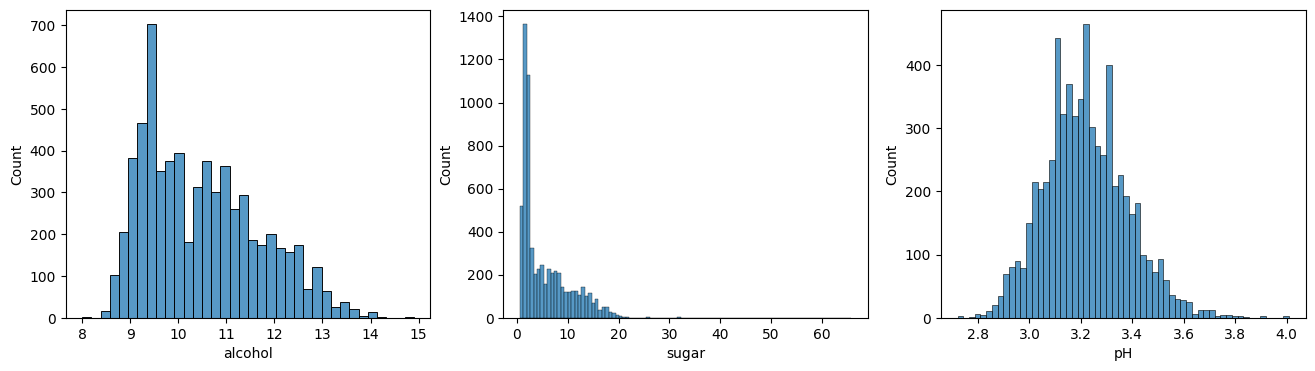

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, v in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=v, ax=axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

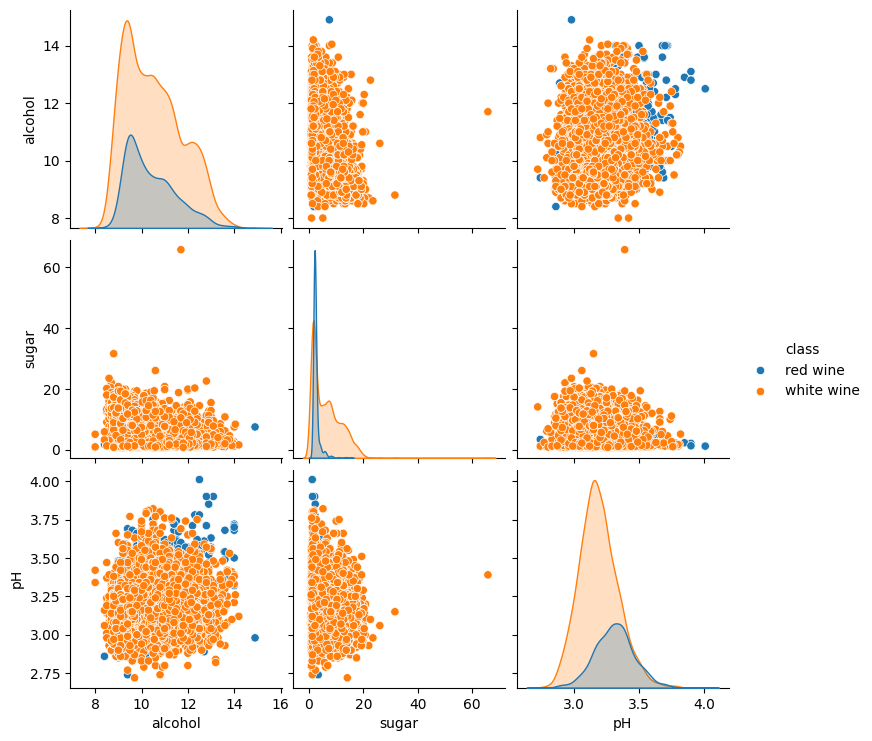

In [36]:
sns.pairplot(wine_df, hue='class')

plt.show()

# 훈련/테스트 셋 나누기

In [50]:
X = wine_df[wine_df.columns[:3]].values # 특성 배열(alcohol, sugar, pH)
y = wine_df['class'].values

In [53]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [54]:
y[:5]

array(['red wine', 'red wine', 'red wine', 'red wine', 'red wine'],
      dtype=object)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [62]:
X_train.shape

(5197, 3)

In [63]:
X_test.shape

(1300, 3)

In [64]:
y_train.shape

(5197,)

In [65]:
y_test.shape

(1300,)

In [66]:
5197/6497

0.7999076496844697